In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv("Admission_Predict.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.isnull().values.sum()

0

In [8]:
(df==0).sum()

Serial No.             0
GRE Score              0
TOEFL Score            0
University Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research             181
Chance of Admit        0
dtype: int64

In [9]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x = df.drop(['SerialNo.','ChanceofAdmit'], axis=1)
y = df['ChanceofAdmit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [18]:
print("Confusion matrix:\n")

print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[45  4]
 [ 9 22]]


In [19]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.8375
2. Precision Score: 0.8461538461538461
3. Recall Score: 0.7096774193548387
4. f1 Score: 0.7719298245614035


In [20]:
print(y_test)

175    1.0
214    1.0
278    0.0
375    0.0
10     0.0
      ... 
338    1.0
362    1.0
259    1.0
134    1.0
388    0.0
Name: ChanceofAdmit, Length: 80, dtype: float64


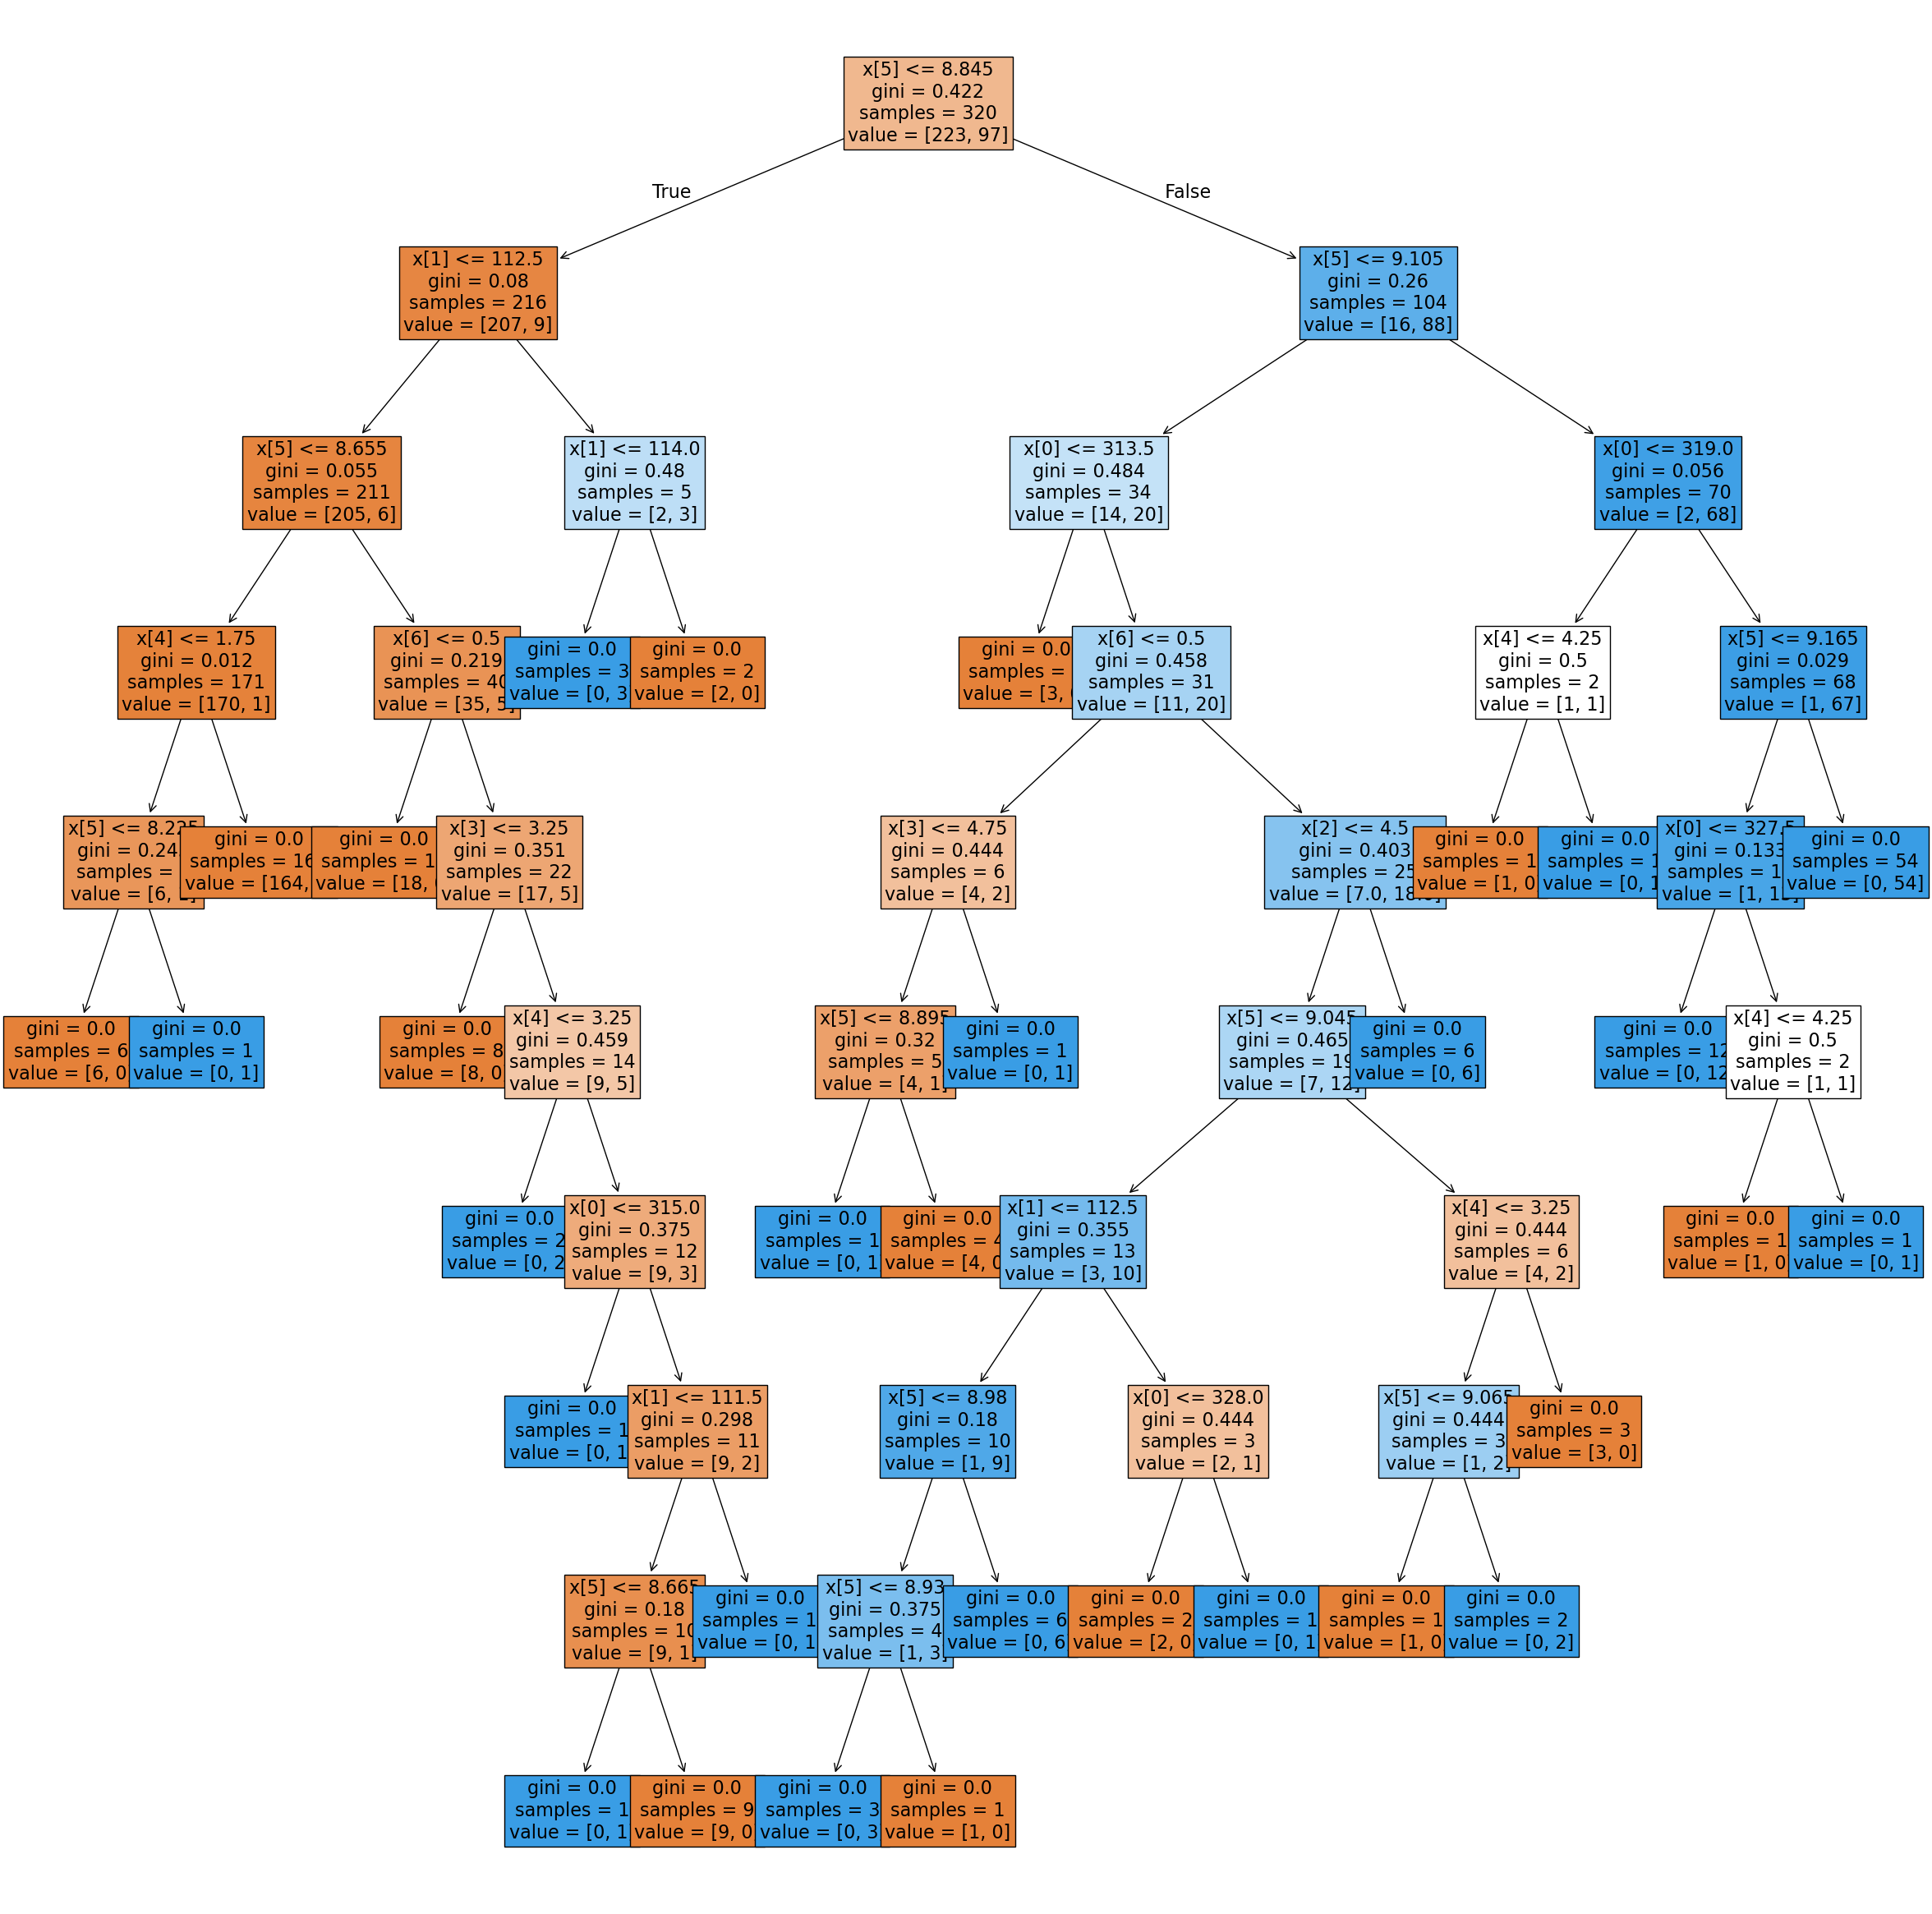

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()

In [23]:
clf.score(x_test,y_test)

0.8375